In [1]:
from alphatools.research import run_pipeline, make_factor_plot
from alphatools.expression import ExpressionAlpha
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline import Pipeline

In [2]:
universe = AverageDollarVolume(window_length=120).top(500)

In [3]:
expressions = {
    8:  '(-rank(((sum(opens, 5)*sum(returns, 5))-delay((sum(opens, 5)*sum(returns, 5)),10))))', 
    53: '(-delta((((close-low) - (high-close)) / (close-low)), 9))',
    101: '((close - opens) / ((high - low) + .001))',
}


In [4]:
e = ExpressionAlpha(expressions[8])

In [5]:
print(e.pipeline_code)

class ExprAlpha_1(CustomFactor):
    inputs = [Returns(window_length=2), USEP.open, USEP.high,
              USEP.low, USEP.close, USEP.volume]
    window_length = 32

    def compute(self, today, assets, out, returns, opens, high, low, close, volume):
        v0 = pd.DataFrame(data=opens).rolling(
            window=5, center=False).sum().values
        v1 = pd.DataFrame(data=returns).rolling(
            window=5, center=False).sum().values
        v2 = v0*v1
        v3 = pd.DataFrame(data=opens).rolling(
            window=5, center=False).sum().values
        v4 = pd.DataFrame(data=returns).rolling(
            window=5, center=False).sum().values
        v5 = v3*v4
        v6 = np.roll(v5, 10)
        v7 = v2 - v6
        v8 = np.apply_along_axis(rankdata, 1, v7)
        v9 = -v8
        out[:] = v9[-1]



In [40]:
one_o_one = (
    ExpressionAlpha(expressions[101]).
    pipeline_factor(mask=universe)
)

In [41]:
expr_factor = (
    ExpressionAlpha('rank(log(close/delay(close, 5)))').
    pipeline_factor(mask=universe)
)

In [6]:
p = Pipeline(screen=universe)
p.add(e.pipeline_factor(mask=universe), "Expression Alpha")

start_date = '2017-01-04'
end_date = '2017-12-28'

df = run_pipeline(p, start_date, end_date)


Formatting factor data for: Expression Alpha
Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 1.58 secs
Time to generate long/short returns: 0.22 secs


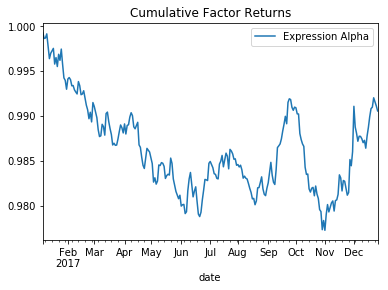

In [7]:
make_factor_plot(df, start_date, end_date);

In [3]:
e = ExpressionAlpha('rank(log(close/delay(opens, 5)))')

In [4]:
print(e.pipeline_code)

class ExprAlpha_1(CustomFactor):
    inputs = [USEP.open, USEP.high, USEP.low, USEP.close]
    window_length = 7

    def compute(self, today, assets, out, opens, high, low, close):
        v0 = np.roll(opens, 5)
        v1 = close/v0
        v2 = np.log(v1)
        v3 = np.apply_along_axis(rankdata, 1, v2)
        out[:] = v3[-1]

